# · 目录

## 一、爬虫部分

## 二、 网站基本属性的统计与可视化
###      （一）用户基本属性
###      （二）作文基本属性

## 三、基于TF-IDF提取每个话题下的关键词

## 四、基于Doc2Vec的应用
### （一）统计关键词
### （二）推荐高级表达词
### （三）其他应用

# · 说明
运行环境：Python 3.7   
操作系统：macOS 10.14

# 一、爬虫部分

请看文件夹“爬虫代码”部分。

# 二、网站基本属性的统计与可视化
## （一）用户基本属性
### 1、地域上

#### （1）统计每个省份和每个城市的作文数量，用来分析该网站在全国的使用情况。   

结果输出到文件province_number.csv和city_number.csv

In [60]:
# -*- coding: UTF-8 -*-
#统计每个省份,每个城市的作文数量
import os
import sys
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import csv 
import operator

cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
pro_list=[]
city_dict={}
city_list=[]
pro_num={}#省份以及频率
city_num={}#城市以及频率
in_author=open(cwd+'/data/author.csv',encoding='UTF-8')
in_pro=open(cwd+'/data/province.txt',encoding='UTF-8')
in_city=open(cwd+'/data/city.txt',encoding='UTF-8')
out_pro=open(cwd+'/result/province_number.csv',mode='w',encoding='UTF-8')
out_city=open(cwd+'/result/city_number.csv',mode='w',encoding='UTF-8')

print('正在执行程序，请稍后......')
#构建省份列表
pro=in_pro.readline()
while pro:
    pro=pro.strip()
    pro_list.append(pro)
    pro=in_pro.readline()
#构建省份-城市字典
city=in_city.readline()
while city:
    pro=city[1:city.find(':')-1]
    c=city[city.find(':')+3:city.find('],')-1].strip().split("','")
    city_dict[pro]=c
    city=in_city.readline()
#构建城市列表
for p in pro_list:
    for i in range(0,len(city_dict[p])):
        city_list.append(city_dict[p][i])
#初始化
for key in pro_list:
    pro_num[key] = 0
for key in city_list:
    city_num[key] = 0

line=in_author.readline()
cnt=1
while line:
    #if cnt%10000==0:
    #    print(cnt)
    line=line.strip().split(',')
    keyword=jieba.posseg.lcut(line[3])
    for word in keyword:
        if word.flag == 'ns':
            w=word.word
            if w.find('省')!=-1 or w.find('市')!=-1 or w.find('县')!=-1:#去掉最后的省、市、县，方便判断
                w=w[:-1]
            if w in pro_list:#更新省份的值
                pro_num[w] += 1     
            elif w in city_list:#更新城市的值
                city_num[w] += 1
               
    cnt+=1
    line=in_author.readline()

for key in pro_list:
    out_pro.write(key+','+str(pro_num[key])+'\n')
out_pro.close()
for key in city_list:
    out_city.write(key+','+str(city_num[key])+'\n')
out_city.close()
print('执行完毕，请到result文件夹中查看结果province_number.csv和city_number.csv')

当前路径为： /Users/fxy/大三上/大数据/论文
正在执行程序，请稍后......
执行完毕，请到result文件夹中查看结果province_number.csv和city_number.csv


#### （2）根据统计出来的省份作文数量画出作文数量的省份分布热力图。  

结果生成html形式的文件：province_picture.html.在result文件夹的html文件夹中查看。   
**需要安装pyecharts包**

In [1]:
# -*- coding: UTF-8 -*-
#画出作文数量的省份分布热力图
import os
import sys
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import csv 
import operator
from pyecharts import Geo
from pyecharts import Map

cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
in_pro=open(cwd+'/data/province_number.csv',encoding='UTF-8')
value=[]
attr=[]
line=in_pro.readline()
while line:
    line=line.strip().split(',')
    line[1]=int(line[1])
    attr.append(line[0])
    value.append(line[1])
    line=in_pro.readline()
map = Map("作文数量的省份分布热力图", title_color="#fff",title_pos="center",width=1200, height=600,background_color='#404a59')
map.add("", attr, value,visual_range=[0, 3000], maptype='china',is_map_symbol_show=False,symbol_size=10,is_visualmap=True, visual_text_color='#fff')
map.render(cwd+'/result/html/province_picture.html')
print('绘图完毕，请到result文件夹的html文件夹中查看结果province_picture.html')

当前路径为： /Users/fxy/大三上/大数据/课程设计/2016202206-范欣妍/代码与数据/统计分析与应用代码
绘图完毕，请到result文件夹的html文件夹中查看结果province_picture.html


效果如图：  
![province](1.png "province")

#### （3）根据统计出来的城市作文数量画出作文数量城市分布散点分布图。

结果生成html形式的文件：city_picture.html.在result文件夹的html文件夹中查看。  
**需要安装pyecharts包**

In [19]:
# -*- coding: UTF-8 -*-
#绘制作文数量城市分布散点分布图
import os
import sys
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import csv 
import operator
from pyecharts import Geo

cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
in_city=open(cwd+'/data/city_number.csv',encoding='UTF-8')
data=[]
line=in_city.readline()
while line:
    line=line.strip().split(',')
    line[1]=int(line[1])
    if line[1] == 0:
        line=in_city.readline()
        continue
    tup=tuple(line)
    data.append(tup)
    line=in_city.readline()
#print(data)
geo=Geo("作文数量城市分布散点分布图","data of articles",title_color="#fff",title_pos="center",width=1000,height=600,background_color='#404a59')
attr,value = geo.cast(data)
geo.add("",attr,value,visual_range=[0, 1000],maptype='china',visual_text_color="#fff",symbol_size=10,is_visualmap=True)
geo.render(cwd+'/result/html/city_picture.html')

print('绘图完毕，请到result文件夹的html文件夹中查看结果city_picture.html')

当前路径为： /Users/fxy/大三上/大数据/论文
绘图完毕，请到result文件夹的html文件夹中查看结果city_picture.html


效果如图：  
![city](2.png "city")

### 2、时间上   
#### （1）统计每个月文章数量和作者数量 

使用的数据结构：多重行索引的DataFrame结构。  
结果查看result文件夹中的date_df.csv

In [25]:
# -*- coding: UTF-8 -*-
#统计每个月文章数量和作者数量
import os
import sys
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import csv 
import operator

cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
print('正在执行程序，请稍后......')
year=['2013','2014','2015','2016','2017','2018']
month=['01','02','03','04','05','06','07','08','09','10','11','12']
#构建多重行索引的DataFrame结构，记录每年每月作文数量和作者数量，初始化为0
date_df=DataFrame(np.random.randint(0,1,size=(72,2)),columns=['article_number','author_number'],index=pd.MultiIndex.from_product([year,month]))
#初始化author字典，年-月-作者列表
author_dict={}
for y in year:
    temp={}
    for m in month:
        temp[m]=[]
    author_dict[y]=temp

in_author=open(cwd+'/data/author.csv',encoding='UTF-8')
line=in_author.readline()
cnt=1
while line:
    #if cnt%10000==0:
    #    print(cnt)
    line=line.split(',')
    index_date=4
    #名字或学校中包含‘，’，去掉噪音
    date=line[index_date]
    index1 = line[index_date][:4]
    index2 = line[index_date][5:7]
    date_df['article_number'][index1][index2] += 1
    if line[2] not in author_dict[index1][index2]:
        author_dict[index1][index2].append(line[2])
        date_df['author_number'][index1][index2] += 1
    cnt+=1
    line=in_author.readline()
date_df.to_csv(cwd+'/result/date_df.csv',mode='w',encoding='UTF-8')
print(date_df)
print('统计完毕，结果请看result文件夹中的date_df.csv')

当前路径为： /Users/fxy/大三上/大数据/论文
正在执行程序，请稍后......
         article_number  author_number
2013 01             331             69
     02             277            112
     03             376            163
     04             374            170
     05             358            162
     06             377            156
     07             424            123
     08             493            178
     09             631            109
     10             413            149
     11             422            153
     12             524            158
2014 01             698            340
     02             480            253
     03            1035            534
     04            1079            532
     05             722            399
     06             193            102
     07             389            198
     08             394            209
     09             403            213
     10             599            313
     11             462            260
     12           

#### （2）求作文数量和作者数量之间的相关关系，并绘散点图

**需要安装包matplotlib**

当前路径为： /Users/fxy/大三上/大数据/论文


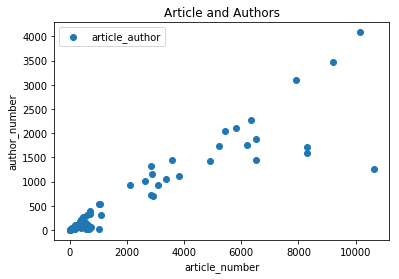

作文数量和作者数量之间的相关系数为： 0.9165479828951919


In [61]:
# -*- coding: UTF-8 -*-
#作文数量和作者数量的相关关系和散点图
import os
import sys
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import csv 
import operator
from matplotlib import pyplot as plt
import matplotlib as mpl

cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
date=pd.read_csv(cwd+'/data/date_df.csv',encoding='UTF-8')

plt.scatter(list(date['article_number']),list(date['author_number']),label='article_author')
plt.xlabel('article_number') 
plt.ylabel('author_number')
plt.title('Article and Authors') 
plt.legend() 
plt.show()

s1=Series(date['article_number'])
s2=Series(date['author_number'])
cor=s1.corr(s2)
print('作文数量和作者数量之间的相关系数为：',cor)

#### （3）根据统计的每年每月的作文数量和作者数量date_df.csv，绘制双折线图

结果请到result文件夹的html文件夹中查看结果author_article_month.html   
**需要安装包pyecharts**

In [27]:
# -*- coding: UTF-8 -*-
#画作文数量和作者数量随月份变化的折线图
import os
import sys
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import csv 
import operator
from pyecharts import Line

cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
in_date=open(cwd+'/data/date_df.csv',encoding='utf-8')
line=in_date.readline()
line=in_date.readline()
l_time=[]
article=[]
authors=[]
while line:
    line=line.strip().split(',')
    l_time.append(line[0]+'/'+line[1])
    article.append(int(line[2]))
    authors.append(int(line[3]))
    line=in_date.readline()

attr = l_time
v1 = article
v2 = authors
line = Line("作文数量与作者数量随月份变化折线图",width=1200,height=700)
line.add("作文数量", attr, v1, mark_point=["max","average"])
line.add("作者数量", attr, v2, is_smooth=True, mark_line=["max", "average"])
#line.show_config()
line.render(cwd+'/result/html/author_article_month.html')
print('绘图完毕，请到result文件夹的html文件夹中查看结果author_article_month.html')

当前路径为： /Users/fxy/大三上/大数据/论文
绘图完毕，请到result文件夹的html文件夹中查看结果author_article_month.html


效果如图：  
![author_article](3.png "author_article")

## （二）作文基本属性
### 1、作文话题情况  
#### （1）统计每个话题的数量，并绘制漏斗图

结果请到result文件夹的html文件夹中查看结果tag_number.html  
**需要安装包pyecharts**

In [32]:
# -*- coding: UTF-8 -*-
#统计每个话题的数量，画出漏斗图
import os
import sys
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import csv 
import operator
from pyecharts import Funnel

cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
in_author=open(cwd+'/data/author.csv',encoding='UTF-8')
line=in_author.readline()
tag_list=[]
tag_dict={}
cnt=1
while line:
    #if cnt%10000==0: 
    #    print(cnt)
    line=line.strip().split(',')
    #处理话题选项
    tag=line[1][3:5]
    #print(tag)
    if tag not in tag_list:
        tag_list.append(tag)
        tag_dict[tag]=1
    else:
        tag_dict[tag]+=1
    cnt+=1
    line=in_author.readline()
out_tag=open(cwd+'/result/tag_num.csv',mode='w',encoding='UTF-8')
for k,v in tag_dict.items():
    out_tag.write(k+','+str(v)+'\n')
print('统计完毕，话题及其作文数量的结果请看result文件夹中的tag_num.csv')
attr = list(tag_dict.keys())
value = list(tag_dict.values())
funnel = Funnel("话题数量对比",width=1500,height=900)
funnel.add("作文话题", attr, value, is_label_show=True, label_pos="inside", label_text_color="#fff")
funnel.render(cwd+'/result/html/tag_number.html')
print('绘图完毕，请到result文件夹的html文件夹中查看结果tag_number.html')

当前路径为： /Users/fxy/大三上/大数据/论文
统计完毕，话题及其作文数量的结果请看result文件夹中的tag_num.csv
绘图完毕，请到result文件夹的html文件夹中查看结果tag_number.html


效果如图：  
![tag_number](4.png "tag_number")

### 2、作文等级情况
#### （1）使用情感分析，对作文的评语进行量化评分，作文衡量作文质量的标准   

每篇作文打分的结果在result文件夹中的comment_score.csv   
**需要安装包snownlp、jieba**

In [35]:
# -*- coding: UTF-8 -*-
#为每个作文的评论打分，将结果存入comment_score.csv
#注意：该程序执行耗时较久
import os
import sys
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import csv 
import operator
import jieba
import jieba.analyse
from matplotlib import pyplot as plt
import matplotlib as mpl
from snownlp import sentiment
from snownlp import SnowNLP
from snownlp.sentiment import Sentiment

cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
print('正在执行程序，请稍后......')
in_comment=open(cwd+'/data/comment.csv',encoding='UTF-8')
out_comment=open(cwd+'/result/comment_score.csv',mode='w',encoding='UTF-8')
line=in_comment.readline()
cnt=1
# 评论例如："中心不突出，表达欠文采，详略不得当"
while line:
    if cnt%10000==0:
        print(cnt)
    line=line.strip().split(',')
    comment=line[2]
    if comment=='':
        out_comment.write(str(cnt)+','+'-1'+'\n')#处理没有评论的作文，标记为-1
        cnt+=1
        line=in_comment.readline()
        continue
    s=SnowNLP(comment)
    out_comment.write(str(cnt)+','+str(s.sentiments)+'\n')
    # for sentence in s.sentences:
    #     print(sentence)
    cnt+=1
    line=in_comment.readline()
print('统计完毕，结果请看result文件夹中的comment_score.csv')

当前路径为： /Users/fxy/大三上/大数据/论文
正在执行程序，请稍后......
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
统计完毕，结果请看result文件夹中的comment_score.csv


#### （2）对打分后的作文按照优、良、中、差四个等级进行划分，统计每个等级的数量

In [37]:
# -*- coding: UTF-8 -*-
#统计四个等级文章数量
#统计评论情感分析后的得分情况
#统计每个月的优、中、差文章的数量情况
# [0.95,1]：优
#[0.75,0.95]：良
#[0.5,0.75]：中
#[0,0.5]：差
import os
import sys
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import csv 
import operator
from matplotlib import pyplot as plt

cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
in_score=open(cwd+'/data/comment_score.csv',encoding='UTF-8')
line=in_score.readline()
line=in_score.readline()
good=0
second=0
median=0
bad=0
cnt=1
while line:
    #if cnt%10000==0:
    #     print(cnt)
    line=line.strip().split(',')
    score=float(line[1])
    if score >= 0.95:
        good+=1
    elif score >= 0.75 and score < 0.95:
        second+=1
    elif score >= 0.5 and score < 0.75:
        median+=1
    elif score >=0 and score < 0.5:
        bad+=1
    elif score == -1:
        line=in_score.readline()
        cnt+=1
        continue
    cnt+=1
    line=in_score.readline()
print("good:",good)
print("second:",second)
print("median:",median)
print("bad:",bad)

当前路径为： /Users/fxy/大三上/大数据/论文
good: 58064
second: 25516
median: 41614
bad: 25188


#### （3）绘制四个等级作文的玫瑰图

结果在result文件夹的html文件夹中查看结果article_class_pie.html  
**需要安装包pyecharts**

In [38]:
# -*- coding: UTF-8 -*-
#作文等级比例玫瑰图
import os
import sys
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import csv 
import operator
from pyecharts import Pie

# good: 58064
# second: 25516
# median: 41614
# bad: 25188
cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
attr = ['优','良','中','差']
value = [58064, 25516, 41614, 25188]
pie = Pie("作文等级比例图", title_pos='center', width=900)
pie.add("", attr, value, center=[50, 50], is_random=False, radius=[30, 75], rosetype='radius',
        is_legend_show=False, is_label_show=True)
pie.render(cwd+'/result/html/article_class_pie.html')
print('绘图完毕，请到result文件夹的html文件夹中查看结果article_class_pie.html')

当前路径为： /Users/fxy/大三上/大数据/论文
绘图完毕，请到result文件夹的html文件夹中查看结果article_class_pie.html


效果如图：  
![article_class](5.png "article_class")

#### （4）统计每年每月四个等级的作文数量  

使用多重行索引的DataFrame结构  
结果在result文件夹中的date_score.csv

In [62]:
# -*- coding: UTF-8 -*-
#统计每年每月四个等级的作文数量
import os
import sys
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import csv 
import operator

cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
print('正在执行程序，请稍后......')
year=['2013','2014','2015','2016','2017','2018']
month=['01','02','03','04','05','06','07','08','09','10','11','12']
date_score=DataFrame(np.random.randint(0,1,size=(72,4)),columns=['good','second','median','bad'],index=pd.MultiIndex.from_product([year,month]))

in_com=open(cwd+'/data/comment_score.csv',encoding='utf-8')
in_date=open(cwd+'/data/author.csv',encoding='utf-8')
line1=in_com.readline()
line1=in_com.readline()
line2=in_date.readline()
cnt=1

while line1 and line2:
    #if cnt%10000==0:
    #  print(cnt)
    line1=line1.strip().split(',')
    line2=line2.strip().split(',')
    score=float(line1[1])
    date=line2[4][:7]
    y=date[0:4]
    m=date[5:7]
    if score >= 0.95:
        date_score['good'][y][m]+=1
    elif score >= 0.75 and score < 0.95:
        date_score['second'][y][m]+=1
    elif score >= 0.5 and score < 0.75:
        date_score['median'][y][m]+=1
    elif score >=0 and score < 0.5:
        date_score['bad'][y][m]+=1
    elif score == -1:
        line1=in_com.readline()
        line2=in_date.readline()
        cnt+=1
        continue
    #print(date)
    cnt+=1
    line1=in_com.readline()
    line2=in_date.readline()
date_score.to_csv(cwd+'/result/date_score.csv',mode='w',encoding='utf-8')
print(date_score)
print('统计完毕，结果请看result文件夹中的date_score.csv')

当前路径为： /Users/fxy/大三上/大数据/论文
正在执行程序，请稍后......
         good  second  median   bad
2013 01   127      47     103    54
     02   116      39      73    49
     03   169      54     104    49
     04   190      40      89    55
     05   154      61      87    56
     06   161      43     108    65
     07   185      42     132    65
     08   224      64     139    66
     09   240      89     153   149
     10   183      45     129    56
     11   155      58     123    86
     12   221      66     126   111
2014 01   330      88     180   100
     02   216      70     125    69
     03   469     100     312   154
     04   414     149     335   181
     05   313     101     183   125
     06    84      21      58    30
     07   152      65     116    56
     08   153      67     114    60
     09   164      35     124    80
     10   288      68     147    96
     11   190      59     152    61
     12   760      80     161   104
2015 01   114       2       7     1
     02    46     

#### （5）统计每个话题下“好作文”的比例   

结果在result文件夹中的tag_good_num.csv

In [43]:
# -*- coding: UTF-8 -*-
#统计每个话题下好作文的比例
import os
import sys
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import csv 
import operator

cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
print('正在执行程序，请稍后......')
in_author=open(cwd+'/data/author.csv',encoding='UTF-8')
in_com=open(cwd+'/data/comment_score.csv',encoding='utf-8')
line1=in_author.readline()
line2=in_com.readline()
line2=in_com.readline()
tag_list=[]
tag_dict={}
good_dict={}
cnt=1
while line1 and line2:
    #if cnt%10000==0: 
    #  print(cnt)
    line1=line1.strip().split(',')
    line2=line2.strip().split(',')
    score=float(line2[1])
    #处理话题选项
    tag=line1[1][3:5]
    if tag not in tag_list:
        tag_list.append(tag)
        tag_dict[tag]=1
        if score>=0.75:
            good_dict[tag]=1
    else:
        tag_dict[tag]+=1
        if score>=0.75:
            good_dict[tag]+=1
    cnt+=1
    line1=in_author.readline()
    line2=in_com.readline()
print(tag_list)
out_tag=open(cwd+'/result/tag_good_num.csv',mode='w',encoding='UTF-8')
for l in tag_list:
    out_tag.write(l+','+str(good_dict[l])+','+str(tag_dict[l])+'\n')
print('统计完毕，结果请看result文件夹中的tag_good_num.csv')

当前路径为： /Users/fxy/大三上/大数据/论文
正在执行程序，请稍后......
['事件', '人物', '公德', '动物', '命题', '哲理', '地域', '情感', '成长', '文化', '植物', '热点', '自然', '节日', '话题', '风景']
统计完毕，结果请看result文件夹中的tag_good_num.csv


#### （6）在一张图中绘制不同话题下好作文占比的环形图

数据依据上一个程序统计出来的每个话题好作文的数量和总数量。    
**需要安装包pyecharts**

In [44]:
# -*- coding: UTF-8 -*-
#在一张图中绘制不同话题下好作文占比的环形图
import os
import sys
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import csv 
import operator
from pyecharts import Pie

cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
pie = Pie('各类话题下"好作文"所占的比例', title_pos=400,width=1200,height=450)
pie.add("", ["事件", ""], [3936,10906], center=[10, 30], radius=[18, 24],
        label_pos='center', is_label_show=True, label_text_color=None, )
pie.add("", ["人物", ""], [6939,14423], center=[20, 30], radius=[18, 24],
        label_pos='center', is_label_show=True, label_text_color=None, legend_pos='left')
pie.add("", ["公德", ""], [1698,3491], center=[30, 30], radius=[18, 24],
        label_pos='center', is_label_show=True, label_text_color=None)
pie.add("", ["动物", ""], [1866,3032], center=[40, 30], radius=[18, 24],
        label_pos='center', is_label_show=True, label_text_color=None)
pie.add("", ["命题", ""], [417,708], center=[50, 30], radius=[18, 24],
        label_pos='center', is_label_show=True, label_text_color=None)
pie.add("", ["哲理", ""], [1090,1471], center=[60, 30], radius=[18, 24],
        label_pos='center', is_label_show=True, label_text_color=None)
pie.add("", ["地域", ""], [378,483], center=[70, 30], radius=[18, 24],
        label_pos='center', is_label_show=True, label_text_color=None)
pie.add("", ["情感", ""], [4919,6985], center=[80, 30], radius=[18, 24],
        label_pos='center', is_label_show=True, label_text_color=None)
pie.add("", ["成长", ""], [5862,10510], center=[10, 70], radius=[18, 24],
        label_pos='center', is_label_show=True, label_text_color=None)
pie.add("", ["文化", ""], [342,486], center=[20, 70], radius=[18, 24],
        label_pos='center', is_label_show=True, label_text_color=None)
pie.add("", ["植物", ""], [2117,1817], center=[30, 70], radius=[18, 24],
        label_pos='center', is_label_show=True, label_text_color=None)
pie.add("", ["热点", ""], [789,880], center=[40, 70], radius=[18, 24],
        label_pos='center', is_label_show=True, label_text_color=None)
pie.add("", ["自然", ""], [12813,13738], center=[50, 70], radius=[18, 24],
        label_pos='center', is_label_show=True, label_text_color=None)
pie.add("", ["节日", ""], [3934,7055], center=[60, 70], radius=[18, 24],
        label_pos='center', is_label_show=True, label_text_color=None)
pie.add("", ["话题", ""], [10254,15856], center=[70, 70], radius=[18, 24],
        label_pos='center', is_label_show=True, label_text_color=None)
pie.add("", ["风景", ""], [710,477], center=[80, 70], radius=[18, 24],
        label_pos='center', is_label_show=True, label_text_color=None)

pie.render(cwd+'/result/html/good_article_pie.html')
print('绘图完毕，请到result文件夹的html文件夹中查看结果good_article_pie.html')

当前路径为： /Users/fxy/大三上/大数据/论文
绘图完毕，请到result文件夹的html文件夹中查看结果good_article_pie.html


效果如图：  
![good_article](6.png "good_article")

#### （7）统计每一年不同等级作文的数量，并绘制柱状图

依据（4）统计出的每年每月的不同等级的作文数量，利用DataFrame中的groupby函数求得每年的作文数量。   
**需要安装包pyecharts**

In [63]:
# -*- coding: UTF-8 -*-
#统计每一年不同等级作文的数量，并绘制柱状图
import os
import sys
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import csv 
import operator
import jieba
import jieba.analyse
from datetime import datetime
from pyecharts import Bar

cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
year=['2013','2014','2015','2016','2017','2018']
date=pd.read_csv(cwd+'/data/date_score.csv',encoding='UTF-8')
year_date=date.groupby(by=['year']).sum().reset_index()#按照年份分类来求每一年四个等级的和
print(year_date)

attr = year
v1=list(year_date['good'])
v2=list(year_date['second'])
v3=list(year_date['median'])
v4=list(year_date['bad'])
bar = Bar("2013-2018年四个等级的作文数量统计图",width=1200,height=700)
bar.add("Good", attr, v1, mark_line=["average"], mark_point=["max", "min"])
bar.add("Second", attr, v2, mark_line=["average"], mark_point=["max", "min"])
bar.add("Median", attr, v3, mark_line=["average"], mark_point=["max", "min"])
bar.add("Bad", attr, v4, mark_line=["average"], mark_point=["max", "min"])
bar.render(cwd+'/result/html/four_bar_year.html')
print('绘图完毕，请到result文件夹的html文件夹中查看结果four_bar_year.html')

当前路径为： /Users/fxy/大三上/大数据/论文
   year  month   good  second  median    bad
0  2013     78   2125     648    1366    861
1  2014     78   3533     903    2007   1116
2  2015     78   5295      67     115     73
3  2016     78  22181   11399   15336  11738
4  2017     78  24376   12463   22685  11362
5  2018     36    554      36     105     38
绘图完毕，请到result文件夹的html文件夹中查看结果four_bar_year.html


效果如图：  
![bar](7.png "bar")

# 三、基于TF-IDF提取每个话题下的关键词

说明：由于时间和硬件限制，第三和四部分未使用15万文本共16个话题的大数据集进行实验，采用了16个话题之一的“事件”类话题的文本进行训练，实际使用了14784条文本共38个子话题的小规模数据集。  

### （1）计算每个话题（38个）下每个单词的tf、idf值并写入文件

**需要安装包jieba、sklearn、codecs**

In [48]:
# -*- coding: UTF-8 -*-
#先只处理“事件类话题”的情况，一万四千多条文本
#计算每个话题下每个单词的tf、idf值并写入文件
#注意：此程序运行速度非常慢
from __future__ import division
import os
import sys
import numpy as np
import pandas as pd
import math 
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import jieba.posseg as pseg 
import codecs
import jieba
import jieba.analyse
  
cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
tw_map = dict()  #key: tag，value: tag中包含的所有文档
corpus = []  #所有文档[[文章1],[文章2],[文章3]]
fin = codecs.open(cwd+"/data/shi_jian.csv", "r", encoding="utf-8")  # format: 话题/事件/秋游\t作文原文
print("Construct tag to words dict......")
line = fin.readline().strip()
ccnt=1
while line:
    if ccnt%1000==0:
        print(ccnt)
    line = line.split('\t')
    three_tag = line[0]  # 三级tag
  
    if len(three_tag.split('/')) != 3:  # 保证tag的格式正确
        ccnt+=1
        line = fin.readline().strip()
        continue 
    tag = line[0]#标签
    content = line[1]#原文
  
    words = []
    word_flags = []
    seg = pseg.cut(content)  # 对原文进行分词及词性标注
    for w in seg:
        word_flags.append((w.word, w.flag))
        words.append(w.word)#所有词
  
  #for tf
    if tag not in tw_map:#加入一个新标签
        tw_map[tag] = []
    tw_map[tag].extend(word_flags)#每个标签对应该标签下的所有文本
  
  #for idf
    corpus.append(words)#存下所有文本的词
  
    ccnt+=1
    line = fin.readline().strip()
fin.close()
print("Construct tag to words dict finished......")

tag_list = []  # 标签列表
name_list = []  #单词列表
flag_list = []  #词性列表
tf_list = []  #单词对应的tf值列表
idf_list = []  #单词对应的idf值列表
csv_file = cwd+"/result/tfidf_value.csv"  #将最后的结果以表格的形式写入csv文件
stopwords = [w.strip() for w in codecs.open(cwd+'/data/stopwords.txt', 'r', encoding='utf-8').readlines()] #停用词
print("Write tag/word/flag/tf/idf to dataframe......")
i = 1
print(len(tw_map.keys()))
for tag in tw_map.keys():
    tag_list = []  # 标签列表
    name_list = []  #单词列表
    flag_list = []  #词性列表
    tf_list = []  #单词对应的tf值列表
    idf_list = []  #单词对应的idf值列表
    print("\t***Now calculate tf/idf value for %d %s" % (i, tag))
    i += 1
    word_flag = tw_map[tag]
    words = []
    for w_f in word_flag:
        words.append(w_f[0])
    n_word_flag = list(set(word_flag))  #去重
    cnt_tag=1
    print('\n\t tag ',cnt_tag,' has ',len(n_word_flag),' words')
    for w_f in n_word_flag:
        if cnt_tag%1000==0:
            print(cnt_tag)
        cnt_tag+=1
        word, flag = w_f 

        if (word in stopwords): #去除停用词
            continue 
        if len(word) == 1:#去除长度为1的词
            continue

        tag_list.append(tag)
        name_list.append(word)  
        flag_list.append(flag)

        #calculate tf 
        tf = words.count(word) / len(words)#wordes为该标签下所有的词 word需要统计的词
        tf_list.append(tf)

        #calculate idf 
        doc_cn = 0
        for doc in corpus:#corpus是所有文本的词，doc为一个列表，是一个文本里的词
            if word in doc:#统计这个词出现在了多少个文本里
                doc_cn += 1
        idf = math.log(len(corpus) / (doc_cn + 1))
        idf_list.append(idf)

    print("tag list length: ", len(tag_list))
    print("name list length: ", len(name_list))
    print("flag list length: ", len(flag_list))
    print("tf list length: ", len(tf_list))
    print("idf list length: ", len(idf_list))

    b = pd.DataFrame(tag_list, columns=['tag'])
    c = pd.DataFrame(name_list, columns=['name'])
    d = pd.DataFrame(flag_list, columns=['flag'])
    e = pd.DataFrame(tf_list, columns=['tf'])
    g = pd.DataFrame(idf_list, columns=['idf'])
    tfidf_data = pd.DataFrame(pd.concat([b, c, d, e, g], axis=1))

    tfidf_data.to_csv(csv_file, mode='a',index=False)
print('统计完毕，结果请看result文件夹中的tfidf_value.csv')

当前路径为： /Users/fxy/大三上/大数据/论文
Construct tag to words dict......
1000
2000
3000
4000
5000
6000
7000


KeyboardInterrupt: 

### （2）计算tf和idf之间的乘积并排序；绘制一个话题前50关键词的词云图

**需要安装包codecs、wordcloud、PIL**

当前路径为： /Users/fxy/大三上/大数据/论文
Write tag 话题/事件/秋游 keywords in tf-idf to file....
Write tag 话题/事件/开学 keywords in tf-idf to file....
Write tag 话题/事件/骑马 keywords in tf-idf to file....
Write tag 话题/事件/七七事变 keywords in tf-idf to file....
Write tag 话题/事件/考试 keywords in tf-idf to file....
Write tag 话题/事件/聚会 keywords in tf-idf to file....
Write tag 话题/事件/演讲 keywords in tf-idf to file....
Write tag 话题/事件/周记 keywords in tf-idf to file....
Write tag 话题/事件/童年趣事 keywords in tf-idf to file....
Write tag 话题/事件/拔河 keywords in tf-idf to file....
Write tag 话题/事件/暑假 keywords in tf-idf to file....
Write tag 话题/事件/家务 keywords in tf-idf to file....
Write tag 话题/事件/运动 keywords in tf-idf to file....
Write tag 话题/事件/滑冰 keywords in tf-idf to file....
Write tag 话题/事件/趣事 keywords in tf-idf to file....
Write tag 话题/事件/班会 keywords in tf-idf to file....
Write tag 话题/事件/寒假 keywords in tf-idf to file....
Write tag 话题/事件/读书 keywords in tf-idf to file....
Write tag 话题/事件/校园生活 keywords in tf-idf to file....
Write tag 话题/事件

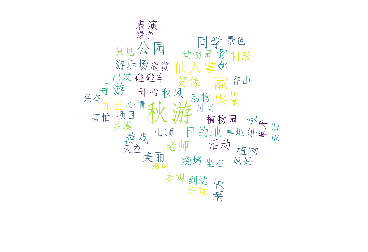

统计完毕，结果请看result文件夹中的tfidf_keywords.txt和word_cloud.jpg


In [59]:
# -*- coding: UTF-8 -*-
#计算tf和idf之间的乘积并排序
#绘制一个话题前50关键词的词云图
import os
import sys
import numpy as np
import pandas as pd
import codecs
import wordcloud as wc
import matplotlib.pyplot as plt
from PIL import Image,ImageSequence
from wordcloud import WordCloud,ImageColorGenerator

cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
class Term():
    def __init__(self, name, flag, tf, idf, tfidf):
        self.name = name 
        self.flag = flag
        self.tf = tf 
        self.idf = idf 
        self.tfidf = tfidf

def word_cloud(word_dict):#绘制词云图
    print("\n正在绘制词云图......")
    image = Image.open(cwd+'/data/back.jpg')#加载背景图，轮廓为中国地图
    graph = np.array(image)
    cloud = wc.WordCloud(
            #设置字体，不指定就会出现乱码，文件名不支持中文
            font_path=cwd+"/data/simfang.ttf", 
            #font_path=path.join(d,'simsun.ttc'),
            #设置背景色，默认为黑，可根据需要自定义为颜色
            background_color='white', 
            #词云形状，
            mask=graph,
            #允许最大词汇
            #max_words=500,
            #最大号字体，如果不指定则为图像高度
            max_font_size=100,  
            #画布宽度和高度，如果设置了msak则不会生效
            width=600,
            height = 400,
            margin = 2,
            #词语水平摆放的频率，默认为0.9.即竖直摆放的频率为0.1
            prefer_horizontal = 0.8
        ).generate_from_frequencies(word_dict)
    image_colors=ImageColorGenerator(graph)
    cloud.to_file(cwd+"/result/word_cloud.jpg") #保存图片
    #显示词云图片
    plt.imshow(cloud)
    #不现实坐标轴
    plt.axis('off')
    plt.show()

csv_file = cwd+"/data/tfidf_value_1.csv"
tfidf_data = pd.read_csv(csv_file)
tag_list = list(tfidf_data['tag'])
name_list = list(tfidf_data['name'])
flag_list = list(tfidf_data['flag'])
tf_list = list(tfidf_data['tf'])
idf_list = list(tfidf_data['idf'])

cand_flag = ['n', 'nr', 'ns', 'v', 'vn', 'a', 'an']  # 定义选取的词性
tk_map = dict()
for i in range(len(tag_list)):
    tag = tag_list[i]
    if tag not in tk_map:
        tk_map[tag] = []
    name = name_list[i]
    flag = flag_list[i]
    tf = tf_list[i]
    idf = idf_list[i]
    if flag not in cand_flag:  #不选择不满足词性的单词
        continue 

    tfidf = tf * idf 

    t = Term(name, flag, tf, idf, tfidf)
    tk_map[tag].append(t)

f1 = codecs.open(cwd+"/result/tfidf_keywords.txt", "w", encoding="utf-8") #tf与idf乘积

word_dict={}
for tag, keywords in tk_map.items():
    kw_list = keywords 

    #sorted in tfidf
    ti_kw_list = sorted(kw_list, key=lambda t: t.tfidf, reverse=True)[:500]  #取前500关键词
  
    #write keywords 
    print("Write tag %s keywords in tf-idf to file...." % tag)
    line = tag + '\t'
    cnt=1
    for kw in ti_kw_list:
        if tag=='话题/事件/秋游':
            word_dict[kw.name]=int(kw.tf*kw.idf*10000)
        if cnt>50:
            break
        cnt+=1
        line = line + kw.name + ','#'(%s, %.4f)'%(kw.flag, kw.tf*kw.idf) + ' '
    f1.write(line + '\n')
    
f1.close()
#绘制"秋游“话题的词云图
word_cloud(word_dict)
print('统计完毕，结果请看result文件夹中的tfidf_keywords.txt和word_cloud.jpg')

# 四、基于Doc2Vec的应用
### （1）五种方式统计关键词  

训练模型，采用DBOW模型    
只统计了一个话题下的关键词     
**需要安装包gensim、jieba、codecs**

In [52]:
# -*- coding: utf-8 -*-
#使用Doc2Vec训练词向量，用五种标准统计关键词
#注意：该程序运行耗时较久
import sys
import logging
import os
import gensim
# 引入doc2vec
from gensim.models import Doc2Vec
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')  # 忽略警告
import jieba
import jieba.posseg as pseg
import codecs
import pandas as pd
import numpy 

cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
class Term():
    def __init__(self, name, flag, dist, cosine, tfidf, _lambda=0.6):
        self.name = name 
        self.flag = flag
        self.dist = dist 
        self.cosine = cosine 
        self.tfidf = tfidf   
        self.ds_tfidf = _lambda * dist + (1 - _lambda) * tfidf 
        self.cs_tfidf = _lambda * cosine + (1 - _lambda) * tfidf 

def train(data_file):
    tc_map = dict()
    fin = codecs.open(data_file, 'r', encoding='utf-8')
    line = fin.readline().strip()
    while line:
        line = line.split('\t')
        if len(line) != 2:
            line = fin.readline().strip()
            continue
        tag = line[0]
        content = line[1]
        if tag not in tc_map:
            tc_map[tag] = []
        tc_map[tag].append(content)
        line = fin.readline().strip()
    fin.close()

    # 加载数据
    documents = []#可训练 sentence,pragraph,document
    for tag, content in tc_map.items():#tag是标签，content是标签下的所有文本
        # 切词，返回的结果是列表类型
        text = ''.join(tc_map[tag])#将一个标签下所有文本连成一个字符串
        words = list(jieba.cut(text))#切词
        # 这里documents里的每个元素是二元组（一个标签下所有词的列表，一个标签的列表）
        documents.append(gensim.models.doc2vec.TaggedDocument(words, [tag]))
        logging.info('%s has loaded...'%tag)#引入日志配置
    # 模型训练，doc2vec有两种模型, dm=0 dbow, dm=1 dmpv
    #初始化Doc2Vec对象，设置神经网络的隐藏层的单元数为200，生成的词向量的维度也与神经网络的隐藏层的单元数相同。
    #设置处理的窗口大小为8个单词，出现少于2次数的单词会被丢弃掉，同时并发线程数4：
    model = Doc2Vec(documents, dm=0, size=200, window=8, workers=4, min_count=2)
    # corpus_count是文件个数  epochs 训练次数
    model.train(documents, total_examples=model.corpus_count, epochs=50) 
    # 保存模型
    model.save(cwd+'/model/doc2vec_dbow.model')
    return tc_map 

# 返回特征词向量
def getWordVecs(wordList, model):
    word_vec = dict()
    for word_flag in wordList:
        word, flag = word_flag
        try:
            word_vec[word] = (flag, model[word])#返回flag和向量
        except KeyError:
            continue
    return word_vec 
  
# 数据预处理操作：分词，去停用词，词性筛选
def dataPrepos(text, stopkey):
    words = []
    word_flags = []
    pos = ['n', 'nr', 'ns', 'v', 'vn', 'a', 'an']  # 定义选取的词性
    seg = pseg.cut(text)  # 分词
    for i in seg:
        if (i.word, i.flag) not in word_flags and i.word not in stopkey and i.flag in pos:  # 去重 + 去停用词 + 词性筛选
            words.append(i.word)#存所有的词
            word_flags.append((i.word, i.flag))#存所有的词及其属性
    return words, word_flags 
  
if __name__ == "__main__":
    data_file = cwd+'/data/shi_jian.csv'
    #save_file = 'dbow-keywords.txt'

    print("training model......")
    tc_map = train(data_file)  #训练doc2vec模型
    print("model training finished......")

    print("model loading......")
    model = Doc2Vec.load(cwd+'/model/doc2vec_dbow.model')  #加载模型
    print("model loading finished......")


    stopwords = [w.strip() for w in codecs.open(cwd+'/data/stopwords.txt', 'r', encoding='utf-8').readlines()] #停用词
    #fout = codecs.open(save_file, 'w', encoding='utf-8')
    f1 = open(cwd+'/result/keywords/tfidf_kw.txt',mode='w',encoding='utf-8')
    f2 = open(cwd+'/result/keywords/dist_kw.txt',mode='w',encoding='utf-8')
    f3 = open(cwd+'/result/keywords/cosi_kw.txt',mode='w',encoding='utf-8')
    f4 = open(cwd+'/result/keywords/ds_ti_kw.txt',mode='w',encoding='utf-8')
    f5 = open(cwd+'/result/keywords/cs_ti_kw.txt',mode='w',encoding='utf-8')

    data = pd.read_csv(cwd+'/data/tfidf_value_1.csv')
    print('read finish')
    cnt=1
    print("len-tc_map:",len(tc_map))
    for tag, value in tc_map.items():
        print(cnt)
        if cnt == 2:#只处理第一个话题的关键词
              break
        cnt+=1
        text = ''.join(value)#将一个标签下的文本全部拼接起来
        #处理文本
        words, word_flags = dataPrepos(text, stopwords)
        # 获取候选关键词的词向量
        wordvecs = getWordVecs(word_flags, model)  # 获取候选关键词的词向量表示,dict();key为word，value为flag和向量？
        tag_vec = numpy.array(model.docvecs[tag])  #获取标签的向量表示
    
        kw_list = []
        ccnt=1
        print("len-wordvecs:",len(wordvecs))
        for word, flag_vector in wordvecs.items():
            if ccnt%100==0:
                print("\t",ccnt)
            ccnt+=1
            flag, vector = flag_vector 
            dist = numpy.sqrt(numpy.sum(numpy.square(tag_vec - numpy.array(vector))))  #单词向量与标签向量之间的距离
            cosi = numpy.dot(tag_vec, numpy.array(vector))/(numpy.linalg.norm(tag_vec)*(numpy.linalg.norm(numpy.array(vector)))) #cosi相似度
            if not data[(data.tag==tag)&(data.name==word)&(data.flag==flag)].empty:
                row = data[(data.tag==tag)&(data.name==word)&(data.flag==flag)]
                flag_ = row['flag']
                tf = float(row['tf'])
                idf = float(row['idf'])
                tfidf = tf * idf
            else:
                flag_ = 'unk'
                tfidf = 0.0
            t = Term(word, flag_, dist, cosi, tfidf)
            kw_list.append(t)
        #排序，获得前500关键词
        ti_kw_list = sorted(kw_list, key=lambda t: t.tfidf, reverse=True)[:500]
        s_kw_list = sorted(kw_list, key=lambda t: t.dist, reverse=False)[:500]
        c_kw_list = sorted(kw_list, key=lambda t: t.cosine, reverse=True)[:500]
        ds_ti_kw_list = sorted(kw_list, key=lambda t: t.ds_tfidf, reverse=True)[:500]
        cs_ti_kw_list = sorted(kw_list, key=lambda t: t.cs_tfidf, reverse=True)[:500]
        n_tag = tag + '\t' + '\n'
        f1.write(n_tag)
        f2.write(n_tag)
        f3.write(n_tag)
        f4.write(n_tag)
        f5.write(n_tag)
        for kw in ti_kw_list:
            f1.write(str(kw.name)+'\t'+str(kw.tfidf)+'\n')
        for kw in s_kw_list:
            f2.write(str(kw.name)+'\t'+str(kw.dist)+'\n')
        for kw in c_kw_list:
            f3.write(str(kw.name)+'\t'+str(kw.cosine)+'\n')
        for kw in ds_ti_kw_list:
            f4.write(str(kw.name)+'\t'+str(kw.ds_tfidf)+'\n')
        for kw in cs_ti_kw_list:
            f5.write(str(kw.name)+'\t'+str(kw.cs_tfidf)+'\n')

f1.close()
f2.close()
f3.close()
f4.close()
f5.close()
print('执行完毕，结果请看result文件夹中的keywords文件夹')

当前路径为： /Users/fxy/大三上/大数据/论文
training model......


model training finished......
model loading......
model loading finished......
read finish
len-tc_map: 38
1
len-wordvecs: 7647
	 100
	 200
	 300
	 400
	 500
	 600
	 700
	 800
	 900
	 1000
	 1100
	 1200
	 1300
	 1400
	 1500
	 1600
	 1700
	 1800
	 1900
	 2000
	 2100
	 2200
	 2300
	 2400
	 2500
	 2600
	 2700
	 2800
	 2900
	 3000
	 3100
	 3200
	 3300
	 3400
	 3500
	 3600
	 3700
	 3800
	 3900
	 4000
	 4100
	 4200
	 4300
	 4400
	 4500
	 4600
	 4700
	 4800
	 4900
	 5000
	 5100
	 5200
	 5300
	 5400
	 5500
	 5600
	 5700
	 5800
	 5900
	 6000
	 6100
	 6200
	 6300
	 6400
	 6500
	 6600
	 6700
	 6800
	 6900
	 7000
	 7100
	 7200
	 7300
	 7400
	 7500
	 7600
2


### （2）推荐高级表达词  

**需要安装包gensim、jieba、codecs**

In [55]:
# -*- coding: utf-8 -*-
#使用Doc2Vec推荐高级表达词
import sys
import logging
import os
import gensim
# 引入doc2vec
from gensim.models import Doc2Vec
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')  # 忽略警告
import jieba
import jieba.posseg as pseg
import codecs
import pandas as pd
import numpy 

cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)
class Term():
    def __init__(self, name, flag, dist, cosine, tfidf, _lambda=0.6):
        self.name = name 
        self.flag = flag
        self.dist = dist 
        self.cosine = cosine 
        self.tfidf = tfidf   
        self.ds_tfidf = _lambda * dist + (1 - _lambda) * tfidf 
        self.cs_tfidf = _lambda * cosine + (1 - _lambda) * tfidf 

if __name__ == "__main__":
    data_file = cwd+'/model/shi_jian.csv'
    save_file = cwd+'/model/dbow-keywords.txt'

    print("model loading......")
    model = Doc2Vec.load(cwd+'/model/doc2vec_dbow.model')  #加载模型
    print("model loading finished......")
    stopwords = [w.strip() for w in codecs.open(cwd+'/data/stopwords.txt', 'r', encoding='utf-8').readlines()] #停用词
    fout = codecs.open(save_file, 'w', encoding='utf-8')
  
    data = pd.read_csv(cwd+'/data/tfidf_value_1.csv')
    cnt=1
    print("寻找相近词\n")#寻找距离最近的词
    #寻找的词为tfidf_value_1.csv中已经有的词

    while True:
        alpha = 0.6
        usr_word=input("请输入你想查询的词：")
        if usr_word=='-1':
            break
        try:
            vector=numpy.array(model[usr_word])
        except KeyError:
            print("无法找到这个词，请重新输入一个词：")
            continue
        #先找离搜索关键词最近的话题，再找关键词
        tag = list(set(list(data['tag'])))
        candi_tag={}
        for t in tag:
            tag_vec = numpy.array(model.docvecs[t])
            #dist = numpy.sqrt(numpy.sum(numpy.square(numpy.array(model.docvecs[t]) - vector)))
            cosi = numpy.dot(tag_vec, vector)/(numpy.linalg.norm(tag_vec)*(numpy.linalg.norm(vector)))
            candi_tag[t] = cosi
        s_candi_tag = sorted(candi_tag.items(), key=lambda x:x[1], reverse=True)[0]
        print("查询词最相似的话题为：",s_candi_tag)

        candi_word={}
        cnt=1
        print("候选相似词为：")
        for i in range(0,data.iloc[:,0].size):
            if data['tag'][i] != s_candi_tag[0]:
                continue
            cw = data['name'][i]
            cw = str(cw)
            cw = cw.strip()
            if len(cw) <=3 :
                continue
            if cnt%100000==0:
                print(cnt)
            cnt+=1
            try:
                temp_vec=numpy.array(model[cw])
            except KeyError:
                continue
            dist = numpy.sqrt(numpy.sum(numpy.square(temp_vec - vector)))
            cosi = numpy.dot(temp_vec, vector)/(numpy.linalg.norm(temp_vec)*(numpy.linalg.norm(vector)))
            ds_tfidf = alpha * dist + (1 - alpha) * data['tf'][i] * data['idf'][i]
            candi_word[cw] = ds_tfidf
        s_candi_word = sorted(candi_word.items(), key=lambda x:x[1], reverse=True)[:50]
        ans=[]
        for s in s_candi_word:
            ans.append(s[0])
        print(ans)

当前路径为： /Users/fxy/大三上/大数据/论文
model loading......
model loading finished......
寻找相近词

请输入你想查询的词：蝴蝶
查询词最相似的话题为： ('话题/事件/探险', 0.1911442)
候选相似词为：
['Boss', '艰难险阻', '2095', '保护环境', '生命危险', '硬着头皮', '有说有笑', '亭亭玉立', '无时无刻', '半途而废', '科普知识', '珠穆朗玛峰', '不怕困难', '无法弥补', '得意忘形', '浓烟滚滚', '生活习惯', '大江南北', '刮目相看', '四处寻找', '解决问题', '同步进行', '继续前进', '争奇斗艳', '小猴菲菲', '古往今来', '不为人知', '晃晃悠悠', '毫无意义', '勇敢无畏', '难以想象', '缩头乌龟', '坚强不屈', '斗志昂扬', '马里亚纳', '惨遭杀害', '千辛万苦', '无怨无悔', '杂草丛生', '重建家园', '微不足道', '大名鼎鼎', '漫无边际', '十分高兴', '走南闯北', '光芒四射', '花花草草', '爱因斯坦', '开拓创新', '关键在于']
请输入你想查询的词：乌龟
查询词最相似的话题为： ('话题/事件/夏令营', 0.103756994)
候选相似词为：
['边走边想', '汹涌澎湃', '一个劲地', '充满信心', '视死如归', '酸甜苦辣', '特种部队', '蛮不讲理', '不大不小', '生态环境', '漂洋过海', '有说有笑', '热带地区', '锅碗瓢盆', '师范大学', '工作人员', '集合地点', '广阔无垠', '一无所知', '丁丁当当', '地久天长', '人民广场', '眼花缭乱', '刻骨铭心', '英文名字', '走马观花', '七十二变', '互相学习', '只可意会', '唧唧喳喳', '东方明珠', '全部都是', '天坛公园', '火冒三丈', '庞然大物', '高楼大厦', '拔河比赛', '顺手牵羊', '爸爸妈妈', '大饱眼福', '前仰后合', '山青水秀', '解决之道', '不费吹灰之力', '万绿丛中', '革命圣地', '黑咕隆咚', '莺歌燕舞', '分工合作', '

KeyboardInterrupt: 

### （3）Doc2Vec的一些应用

例如：可以寻找与某一标签最相似的话题、进行两个话题相关性的比较、以及推断一个未在原文中出现的句子的句向量。   
**需要安装包gensim、jieba、codecs**

In [2]:
# -*- coding: utf-8 -*-
#Doc2Vec的一些应用
import sys
import logging
import os
import gensim
# 引入doc2vec
from gensim.models import Doc2Vec
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')  # 忽略警告
import jieba
import jieba.posseg as pseg
import codecs
import pandas as pd
import numpy 
cwd=os.getcwd()#获得当前系统路径
print('当前路径为：',cwd)

def test_doc2vec(model):
    # 与标签‘0’最相似的
    print("\n与标签‘毕业’最相似的话题：")
    print(model.docvecs.most_similar('话题/事件/毕业')[0][0])

    # 进行相关性比较
    print("\n话题‘秋游’和‘春游’相似度比较：")
    print(model.docvecs.similarity('话题/事件/秋游','话题/事件/春游'))

    # 也可以推断一个句向量(未出现在语料中)
    print("\n推断原文中没有的句向量，以‘我爱中国’为例：")
    words = u"我爱中国"
    print(model.infer_vector(words.split()))

if __name__ == "__main__":
    print("model loading......")
    model = Doc2Vec.load(cwd+'/model/doc2vec_dbow.model')  #加载模型
    print("model loading finished......")
    
    test_doc2vec(model)

当前路径为： /Users/fxy/大三上/大数据/课程设计/2016202206-范欣妍/代码与数据/统计分析与应用代码
model loading......
model loading finished......

与标签‘毕业’最相似的话题：
话题/事件/典礼

话题‘秋游’和‘春游’相似度比较：
0.46248192

推断原文中没有的句向量，以‘我爱中国’为例：
[ 2.13702908e-03 -1.42960425e-03 -1.59132190e-03  2.43264390e-03
 -6.11456751e-04 -2.21004896e-03 -6.70360751e-04 -9.05288092e-04
 -1.54104171e-04 -2.32104934e-03  1.67845108e-03 -2.22957206e-05
 -1.11526635e-03  6.68955152e-04 -2.15058262e-03 -9.34607524e-04
  1.53093704e-03 -1.40462653e-03  5.90296462e-04 -5.83365618e-04
 -1.27282646e-03  2.46961671e-03  2.05657422e-03  1.01321875e-05
  1.42195576e-03 -1.14284025e-03 -1.45586825e-03  2.22406350e-03
  1.19810342e-03  1.12940907e-03 -3.49675218e-04  2.02285312e-03
  4.44751960e-04 -1.72467646e-03 -6.23151311e-04 -4.32555680e-04
  5.09344507e-04 -1.31327368e-03 -8.56937724e-04  1.08188658e-03
 -3.56300123e-04  8.31362675e-04  1.48587255e-03 -1.86482549e-03
  3.36295663e-04  4.29298001e-04  3.45180801e-04  5.97369159e-04
 -2.17171712e-03 -1.72332197e-

/Users/fxy/anaconda3/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
